In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('E:\prasad\practice\Model Deploy\Students Marks Prediction')

In [3]:
df=pd.read_csv('student_info.csv')

In [4]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
df.shape

(200, 2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


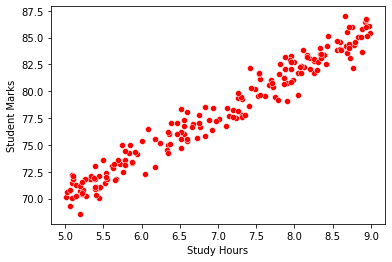

In [6]:
sns.scatterplot(df['study_hours'],df['student_marks'],color='Red')
plt.xlabel('Study Hours')
plt.ylabel('Student Marks')
plt.show()

In [7]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [8]:
df['study_hours']=df['study_hours'].fillna(df['study_hours'].mean())

In [9]:
df['study_hours'].isnull().sum()

0

In [10]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [11]:
df.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [12]:
X=df.iloc[:,:-1]
X.head()

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000


In [13]:
y=df.iloc[:,-1]
y.head()

0    78.50
1    76.74
2    78.68
3    71.82
4    84.19
Name: student_marks, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split,cross_val_score

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 1), (40, 1), (160,), (40,))

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [18]:
def check_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('r2_score:',r2_score(y_test,y_pred))

In [19]:
check_model(LinearRegression(),X_train,X_test,y_train,y_test)

r2_score: 0.942580760104548


In [20]:
check_model(RandomForestRegressor(),X_train,X_test,y_train,y_test)

r2_score: 0.9151563675611407


In [21]:
check_model(DecisionTreeRegressor(),X_train,X_test,y_train,y_test)

r2_score: 0.9024298534493026


In [22]:
check_model(SVR(),X_train,X_test,y_train,y_test)

r2_score: 0.9367045900957489


In [23]:
check_model(KNeighborsRegressor(),X_train,X_test,y_train,y_test)

r2_score: 0.9280784797235286


In [24]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score:  0.942580760104548
MSE:  1.4540976212481111
MAE:  0.9876755341052214
RMSE:  1.2058597021412196


In [25]:
lr.score(X_test,y_test)

0.942580760104548

In [26]:
lr.score(X_train,y_train)

0.9617041525073161

In [27]:
cv=cross_val_score(LinearRegression(),X_train,y_train,cv=5)
print('n_split: ',cv)
print('Average: ',np.average(cv))

n_split:  [0.93279358 0.97343254 0.95834617 0.95330221 0.97248881]
Average:  0.9580726621169422


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='student_marks', ylabel='Density'>

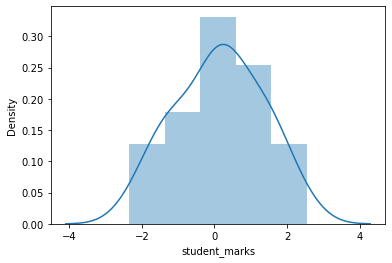

In [28]:
sns.distplot(y_test-y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='student_marks'>

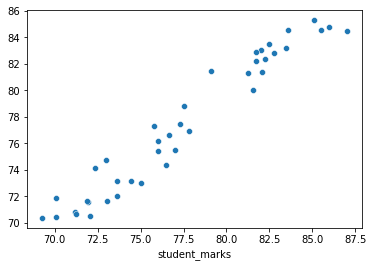

In [29]:
sns.scatterplot(y_test,y_pred)

In [30]:
lr.predict([[12]])

array([97.55523246])

In [31]:
data=np.array([8]).reshape(1,-1)

In [32]:
lr.predict(data)

array([81.84960521])

### Save Model in Pickle & Joblib

In [33]:
import pickle
import joblib

In [34]:
pickle.dump(lr,open('Stu_mark.pickle','wb'))

In [35]:
joblib.dump(lr,'Stu_mark.joblib')

['Stu_mark.joblib']

### Load Pickle Model

In [36]:
model_pickle=pickle.load(open('Stu_mark.pickle','rb'))

In [37]:
prediction=model_pickle.predict(X_test)

In [38]:
r2_score(y_test,prediction)

0.942580760104548

In [39]:
model_pickle.score(X_test,y_test)

0.942580760104548

In [40]:
model_pickle.score(X_train,y_train)

0.9617041525073161

### Load Joblib Model

In [41]:
model_joblib=joblib.load('Stu_mark.joblib')

In [42]:
y_job_pred=model_joblib.predict(X_test)

In [43]:
r2_score(y_test,y_job_pred)

0.942580760104548

In [44]:
model_joblib.score(X_test,y_test)

0.942580760104548

In [45]:
model_joblib.score(X_train,y_train)

0.9617041525073161